<div style="text-align:center;">
    <h1 style="color:#8B0000;"><b> AI VS Human Text Classification </b></h1>
    </div>

<div style="text-align:center;">
    <h3 style="color:darkblue;"><b>By: Ridham Dholaria, Abdullah Ashal Pal, Subhan Ahmed</b></h3>
</div>


## **Introduction**  
AI is getting better at writing but can we still tell the difference between human and machine-generated text? This project will go deep into **how AI and humans write differently** and builds a model to classify text as either <u>AI-generated or human-written</u>
We used a dataset from [Kaggle](https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text), which contains a mix of human-written and AI-generated content. Our goal is to <u>find key differences in writing patterns</u> and train machine learning models to detect AI-generated text with high accuracy 

## **Motivation**  
With AI being widely used currently in content creation, social media and education, it’s becoming harder to <u>spot AI-written text</u> This raises important questions:  
- **Can AI-generated content pass as human-written?**  
- **Do AI and human writers use words, punctuation or sentence structures differently?**  
- **How can we detect AI written text to ensure transparency in writing?**  

Understanding these differences can help in <u>academic integrity, misinformation detection and AI ethics</u>

## **What we do in this Project**  
We take a data driven approach to uncover hidden patterns in AI and human writing. We added visualizations in there as well. Our process includes:  
- Preprocessing text to clean and structure the data
- Visualizing key patterns in word choice, sentence length and punctuation
- Training multiple ml models including Naive Bayes,Logistic Regression, XGBoost, SVM and Neural Networks
- Comparing model performance to find the most effective classifier 

The ultimate goal is to build and deploy a fast and accurate AI detection system that helps differentiate between human and machine-generated text


<h1 style="color:darkblue;"><b>1.Import Libraries & Dataset Overview</b></h1>

In [42]:
# importing all the essential libs
import os
import pandas as pd
import numpy as np
import re
import string
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# all the sklearn libs
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier  
from sklearn.svm import SVC

<h1 style="color:darkblue;"><b>2.Dataset Overview</b></h1>


In [43]:
# loading the dataset
file_path = './AI_Human.csv'
df = pd.read_csv(file_path)

# adding a quick overview of my dataset
print("Dataset Information:")
df.info()
df.head()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


<h1 style="color:darkblue;"><b>3.Data Preprocessing</b></h1>


**Text Cleaning Functions**

Here, I added all our cleaning steps to improve our text quality:

In [44]:
# removing special tags
def remove_tags(text):
    tags = ['\n', '\'', '\"']
    for tag in tags:
        text = text.replace(tag, '')
    return text

# removing punctuation
def remove_punc(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

# converting to lowercase and remove extra spaces
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# removing stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

# lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h2 style="color:red;">My text preprocessing steps</h2>


<h3 style="color:darkgreen;">1. Removing Special Tags</h3>
**What This Does:**  
It removes unwanted symbols like newline characters (`\n`), single quotes (`'`), and double quotes (`"`) because these symbols don't carry important meaning in text analysis

**Example:**  
Input: `"Hello\nWorld"`  
Output: `HelloWorld`

<h3 style="color:darkgreen;">2. Removing Punctuation</h3>
**What This Does:**  
This eliminates punctuation marks such as commas, periods and exclamation marks to simplify my text

**Example:**  
Input: `"Hello, World!"`  
Output: `Hello World`


<h3 style="color:darkgreen;">3. Converting to Lowercase & Removing Extra Spaces</h3>
**What This Does:**  
This here converts all characters to lowercase and removes extra spaces between words or at the start and end of my text

**Example:**  
Input: `"  Hello    WORLD "`  
Output: `hello world`

<h3 style="color:darkgreen;">4. Removing Stopwords</h3>
**What This Does:**  
Here we remove common words like **"the"**, **"is"**, and **"and"** that don't add much meaning to our text

**Example:**  
Input: `"The cat is running"`  
Output: `cat running`


<h3 style="color:darkgreen;">5. Lemmatization </h3>
**What This Does:**  
Lastly this reduces words to their base or dictionary form- making words like **"running"** become **"run"**

**Example:**  
Input: `"The cats are running"`  
Output: `cat run`




**Note:** All these steps clean and simplify the text making it easier for me and for machine learning models to analyze and understand the core meaning without noise


Now I will apply all of these funcs to our dataset 

In [45]:
# appplying all my preprocessing functions
df['text'] = df['text'].apply(remove_tags)
df['text'] = df['text'].apply(remove_punc)
df['text'] = df['text'].apply(clean_text)
#df['text'] = df['text'].apply(remove_stopwords)
## df['text'] = df['text'].apply(lemmatize_text)

# sample of my cleaned text 
print("\nCleaned Text Sample:")
print(df['text'][0])



Cleaned Text Sample:
cars cars have been around since they became famous in the 1900s when henry ford created and built the first modelt cars have played a major role in our every day lives since then but now people are starting to question if limiting car usage would be a good thing to me limiting the use of cars might be a good thing to doin like matter of this article in german suburb life goes on without cars by elizabeth rosenthal states how automobiles are the linchpin of suburbs where middle class families from either shanghai or chicago tend to make their homes experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe passenger cars are responsible for 12 percent of greenhouse gas emissions in europeand up to 50 percent in some carintensive areas in the united states cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go article paris

**NOTE:** I couldn’t apply all of these functions (I commenetd them) because some of them took too long during preprocessing which slowed down my entire code execution. Functions like <u>lemmatization </u> and <u>stopword removal</u> require tokenizing text and performing word lookups making them computationally expensive. Since I was working on a large dataset, running all functions together would take a lot of processing power and time. If you have a fast GPU (Graphics Processing Unit), your system probably can handle these tasks much faster because faster GPUs are optimized for parallel processing allowing multiple computations at the same time. If you have a powerful machine, you can try using both the functions I commented on your system for better text cleaning/improved model accuracy

<h1 style="color:darkblue;"><b>4.Visualizations</b></h1>


**1. Class Distribution**

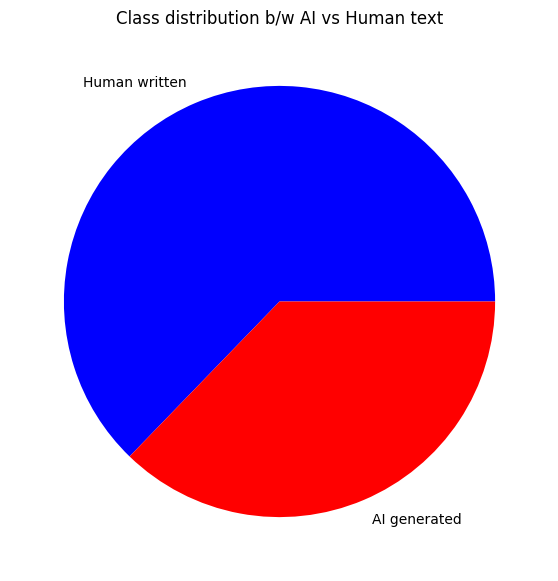

In [46]:
# Will first count total AI vs Human samples and then labels & sizes for my chart
human_count = df[df['generated'] == 0.0].shape[0]
ai_count = df[df['generated'] == 1.0].shape[0]
labels = ["Human written", "AI generated"]
sizes = [human_count, ai_count]
colors = ["blue", "red"]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors)
plt.title("Class distribution b/w AI vs Human text")
plt.show()

In [47]:
# I am counting total texts in the data
total_texts = len(df['generated'])
print('Total texts:', total_texts)

# human-written texts and AI gener texts
human_texts = df['generated'].value_counts()[0.0]
print('Human written texts:', human_texts)
ai_texts = df['generated'].value_counts()[1.0]
print('AI generated texts:', ai_texts)

Total texts: 487235
Human written texts: 305797
AI generated texts: 181438


**2. Word Count Distribution**

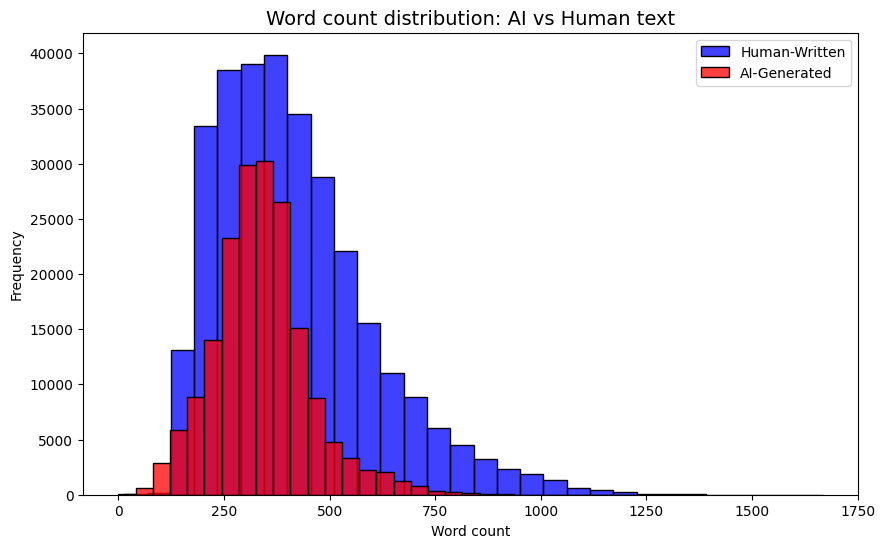

In [48]:
# I calculate word count for each text
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# and split  my dataset into AI and Human text
human_df = df[df['generated'] == 0.0]
ai_df = df[df['generated'] == 1.0]

# and then I plot word Ccunt distribution for AI vs Human text
plt.figure(figsize=(10, 6))
sns.histplot(human_df['word_count'], bins=30,label="Human-Written", color="blue")
sns.histplot(ai_df['word_count'], bins=30, label="AI-Generated", color="red")
plt.title("Word count distribution: AI vs Human text", fontsize=14)
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.legend()
plt.show()


**3. Average Sentence Length in AI vs Human Text**

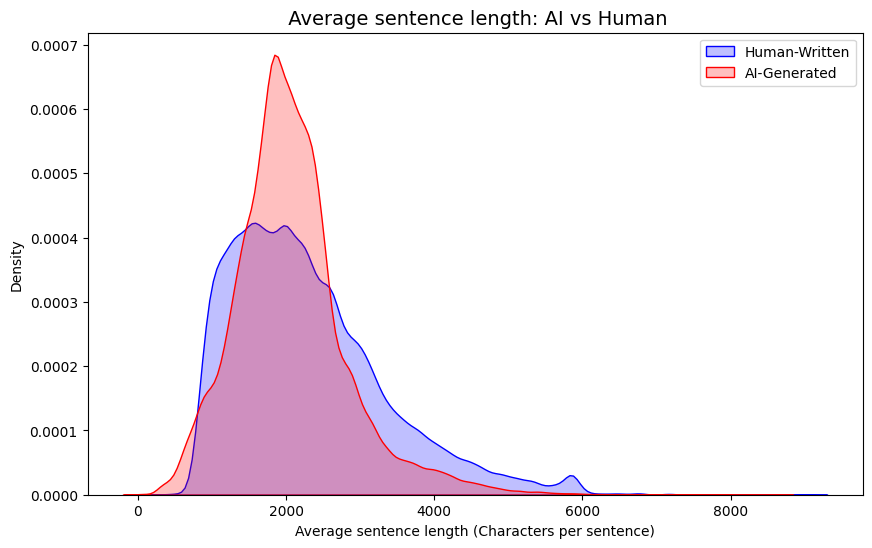

In [49]:
# again filtering using the 'generated' column
human_df = df[df['generated'] == 0.0].copy()
ai_df = df[df['generated'] == 1.0].copy()

# and then computinh sentence length safely
human_df.loc[:, 'sentence_length'] = human_df['text'].apply(lambda x: len(x) / max(1, x.count('.')))
ai_df.loc[:, 'sentence_length'] = ai_df['text'].apply(lambda x: len(x) / max(1, x.count('.')))

#I am plotting sentence length in comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(human_df['sentence_length'], label="Human-Written", color="blue", fill=True)
sns.kdeplot(ai_df['sentence_length'], label="AI-Generated", color="red", fill=True)
plt.title(" Average sentence length: AI vs Human", fontsize=14)
plt.xlabel("Average sentence length (Characters per sentence)")
plt.ylabel("Density")
plt.legend()
plt.show()

AI generated text has a higher average sentence length than human-written text which indicates a tendency for longer and more structured sentences. This suggests to me that AI models may generate more detailed or complex phrasing while human text often contains shorter more of natural sentences

**4. Most Common Words in AI VS Human Texts**

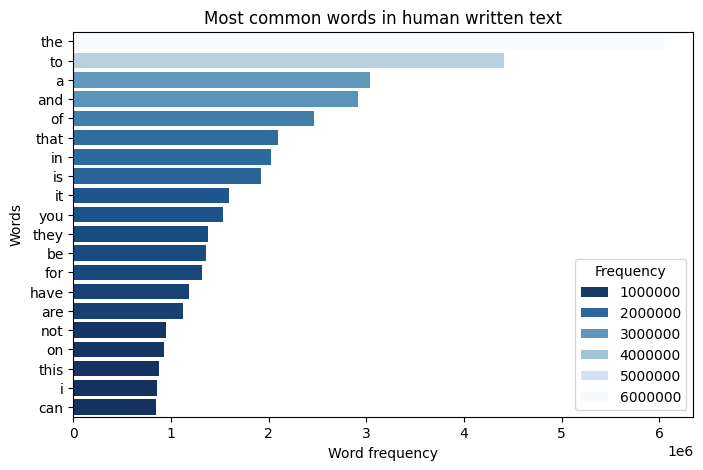

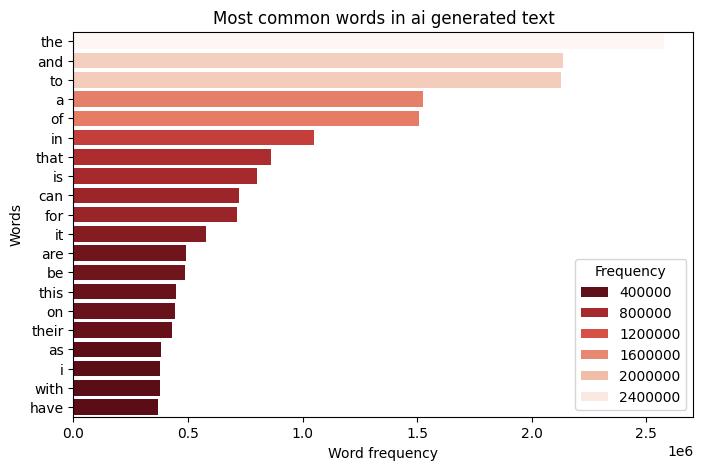

In [50]:
# function to get most common words
def get_top_words(text_series, num_words=20):
    word_list = ' '.join(text_series).split()
    word_freq = pd.Series(word_list).value_counts().nlargest(num_words)  # counting word frequency using pandas
    return pd.DataFrame({"Word": word_freq.index, "Frequency": word_freq.values})

# extracting top words for human and ai text
top_human_words = get_top_words(human_df['text'])
top_ai_words = get_top_words(ai_df['text'])

## human text
plt.figure(figsize=(8, 5))
sns.barplot(data=top_human_words, x="Frequency", y="Word", palette="Blues_r", hue="Frequency")
plt.title("Most common words in human written text")
plt.xlabel("Word frequency")
plt.ylabel("Words")
plt.show()

# aii generated text
plt.figure(figsize=(8, 5))
sns.barplot(data=top_ai_words, x="Frequency", y="Word", palette="Reds_r", hue="Frequency")
plt.title("Most common words in ai generated text")
plt.xlabel("Word frequency")
plt.ylabel("Words")
plt.show()

I analyzed the most common words in AI and human-written text to compare their usage patterns. Both AI and human text commonly use basic words like "the," "to," "and," and "of". Another observation is that AI generated text uses "can" more frequently which suggests to me a pattern of structured or instructional language. Human-written text includes "you" and "they" more which showes to me a tendency for conversational or narrative writing. AI text has a more balanced word distribution while human text relies heavily on a few words like "the". 

**5. Who Uses More Commas in a Sentence? (AI OR Human)**

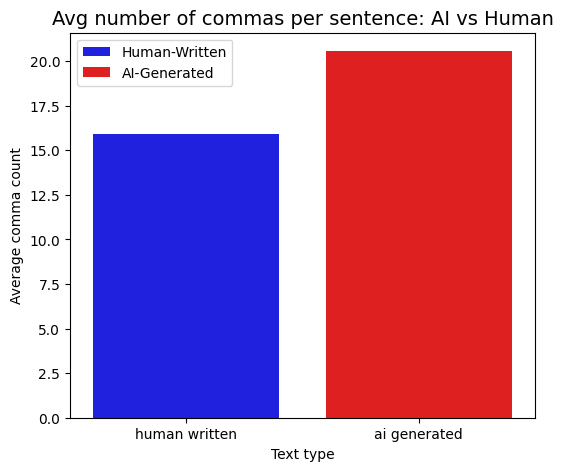

In [51]:
df = pd.read_csv(file_path) # had to reload it cause it wasn't working without this
# I first ensure 'text' column is treated as string and count commaas
if 'comma_count' not in df.columns:  
    df['text'] = df['text'].astype(str)  
    df['comma_count'] = df['text'].apply(lambda x: x.count(','))  # count commas in each text

# and then I compute average comma usage for AI vsHuman text
avg_commas_human = df[df['generated'] == 0.0]['comma_count'].mean()
avg_commas_ai = df[df['generated'] == 1.0]['comma_count'].mean()



plt.figure(figsize=(6, 5))
sns.barplot(x=['human written', 'ai generated'], y=[avg_commas_human, avg_commas_ai], palette=['blue', 'red'], hue =['Human-Written', 'AI-Generated'] )
plt.title("Avg number of commas per sentence: AI vs Human", fontsize=14)
plt.ylabel("Average comma count")
plt.xlabel("Text type")
plt.ylim(0, max(avg_commas_human, avg_commas_ai) + 1)  # I adjusted y axis for clarity
plt.show()

I count the number of commas in AI and human-written text and compare their averages. Since AI uses more commas, it may rely on structured phrasing and formulaic sentence patterns. Human written text usually has fewer commas because it might flow more naturally with varied sentence structures and by the way I feel AI always places commas in fixed positions (e.g., usually after the 3rd or 4th word) 



  <h1 style="color:darkblue;"><b>5.Splitting the Dataset</b></h1>


In [52]:
X = df['text']
y = df['generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training Set Size:", len(X_train))
print("Testing Set Size:", len(X_test))

Training Set Size: 341064
Testing Set Size: 146171


### Why I used a 70-30 Split?

A 70-30 split is commonly used in machine learning because it balances model training and evaluation. In my dataset here, there are **487,235 entries**, meaning **70% (about 341,065 samples)** will be used for training, and **30% (about 146,170 samples)** will be used for testing. Training on 70% of the data ensures the model learns patterns effectively while the remaining 30% allows us to check how well it performs on unseen data. This helps prevent overfitting, where the model memorizes the training data but fails on new data. The dataset is large enough that even 30% I feel will provide a strong solif evaluation set


<h1 style="color:darkblue;"><b>6. Model Building</b></h1>


**1-Naive Bayes**

In [53]:
nb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
])
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

**2- Logistic Regression**

In [54]:
lr_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression(max_iter=1000))
])
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression(max_iter=1000))])

**3- XGBoost**

In [55]:
xgb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, eval_metric='logloss'))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

**4- Support Vector Machine**

In [56]:
##from sklearn.svm import SVC

#svm_pipeline = Pipeline([
#    ('vectorizer', CountVectorizer()),
#    ('tfidf', TfidfTransformer()),
#    ('model', SVC(kernel='linear', probability=True, random_state=42))
#])
#svm_pipeline.fit(X_train, y_train)

**5- Neural Network**

In [57]:
# defining neural network pipeline
nn_pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # this limits vocabulary size for speed
    ('tfidf_transformer', TfidfTransformer(norm=None)),  
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(64, 32),  # Fewer layers, faster training
        activation='relu',  
        solver='sgd',  
        learning_rate_init=0.01,  # 
        alpha=0.0001,  
        batch_size=128,  # usually larger batch sizes speed up training
        max_iter=200,  
        early_stopping=True,  # this is a crucial parameter here since it stops training if no improvement
        random_state=42  
    ))
])

# training my neural network model
nn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer(max_features=5000)),
                ('tfidf_transformer', TfidfTransformer(norm=None)),
                ('mlp',
                 MLPClassifier(batch_size=128, early_stopping=True,
                               hidden_layer_sizes=(64, 32),
                               learning_rate_init=0.01, random_state=42,
                               solver='sgd'))])

### ****
<h2 style="color:red;">Why these models? How do they predict?</h2>

The models I chose to classify text as AI or human are based on word patterns, term importance and statistical relationships. They process text using **CountVectorizer** (to convert words into numbers) and **TF-IDF Transformer** (to weigh important words) before training on different classification models.

---
<h3 style="color:darkgreen;">1. Naive Bayes (MultinomialNB)</h3>

#### **Why this model?**
Naïve Bayes is **fast, efficient and well-suited for text classification** in general. It assumes each word in a text contributes independently to the classification so it makes it useful for tasks like spam detection and sentiment analysis

#### **How it predicts?**
- It **calculates probabilities** of words appearing in AI vs human-written texts I give it
- If a word is **more common in an ai generated text**, it assigns a higher probability to AI
- The final classification is based on the **highest probability**

#### **Pros**
pretty fast and works well with large datasets 
performs well even if there is limited training data

#### **Cons**

assumes word independence, which may not always be accurate  

#### **Example**
If words like "AI", "generated", and "algorithm" appear frequently in AI-written text the model will **classify a text as AI-generated if these words are present in high probability**

---

<h3 style="color:darkgreen;">2. Logistic Regression</h3>

#### **Why this model?**
Logistic Regression predicts **the probability of a text being AI-generated or human-written**. It’s interpretable, simple and effective for binary classifications.

#### **How it predicts?**
- It assigns weights to **each word** based on how strongly it indicates AI or human text
- The model calculates a probability **between 0 and 1** using a **sigmoid function**
- If the probability is **greater than 0.5**, the text is classified as **ai generated**

#### **Pros** 
simple to implement  
works well on structured datasets 

#### **Cons**
struggles with complex text patterns 

#### **Example**
If "GPT" and "neural network" have high weights- the model assigns a **higher probability to AI-generated text**

---

<h3 style="color:darkgreen;">3. XGBoost</h3>
#### **Why this model?**
XGBoost is an optimized version of gradient boosting that runs faster and prevents overfitting. It’s widely used in text classification and fraud detection. 

#### **How it predicts?**
- Like gradient boosting, it corrects mistakes iteratively
- It applies <u>regularization </u> to avoid overfitting on patterns that don’t generalize well

#### **Pros**
again fast and accurate for large datasets
handles complex text patterns


#### **Cons**
reequires careful tuning of hyperparameters

#### **Example**
If words like "AI-generated" appear but are not enough to confirm AI authorship, XGBoost **considers deeper text features before deciding**

<h3 style="color:darkgreen;">4. Support Vector Machine (Svm)</h3>

#### **Why this model?**  
Support Vector Machines (SVM) are also effective for text classification. It works well for distinguishing AI-generated text from human-written content by <u>finding the optimal decision boundary</u>. I initially had four in mind, but later decided to include this one as well. I commented this for now cause it was taking a lot of time to train

#### **How it predicts?**  
- Converts text into numerical form using CountVectorizer and TF-IDF Transformer  
- Finds the best hyperplane that separates AI and human text
- Classifies new text based on its position relative to this boundary

#### **Pros**  
performs well on small datasets, probably thats why it took so much time to train on my dataset
handles high-dimensional text data efficiently 
less prone to overfitting than deep learning models

#### **Cons**  
slower training on very large datasets  
harder to interpret than simpler models
pretty sensitive to imbalanced data

#### **Example**  
If AI-generated text frequently includes words like "GPT" or "algorithm," SVM maps these in a multi-dimensional space and defines a boundary separating them from human-written text. This makes it effective for classification.

---
<h3 style="color:darkgreen;">5. Neural Network (MLPClassifie)</h3>

#### **Why this model?**
A **multi layer perceptron (MLP)** is a type of **neural network** that is useful for text classification because it can learn complex patterns in data. Unlike simpler models like Naive Bayes or Logistic Regression, it captured **nonlinear relationships between words**. This makes it more powerful for distinguishing AI geenerated text from human-written text

#### **How it predicts?**
- The text is first converted into numerical form using **CountVectorizer** (bag-of-words) and **TF-IDF Transformer** (word importance)
- Then the neural network consists of **multiple layers** of neurons that process the input text
- Each layer **transforms the text data** through weighted connections and activation functions
- The final layer **outputs a probability** indicating whether the text is ai generated or human-written

#### **Pros**
learns deep text patterns 
works well with large datasets like mine, capturing complex word associations
adaptive learning rate helps improve training efficiency

#### **Cons**
takes longer to train compared to my other models  

#### **Example**
If a text contains phrases like **"neural network", "generated response", "deep learning"**, the neural network **learns over time** that these words are more likely found in AI-generated text. Instead of just counting words, it identifies **patterns of words together** eventually leading to a more refined classification


---

**Note:** Again each model has strengths and testing multiple approaches helps <u>FIND THE BEST CLASSIFIER</u> for detecting ai generated text

<h1 style="color:darkblue;"><b>7. Model Evaluation</b></h1>


In [58]:
def evaluate_model(pipeline, name):
    y_pred = pipeline.predict(X_test)
    print(f"\n{name} Classification Report")
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred)

nb_acc = evaluate_model(nb_pipeline, "Naive Bayes")
lr_acc = evaluate_model(lr_pipeline, "Logistic Regression")
xgb_acc = evaluate_model(xgb_pipeline, "XGBoost")
## svm_acc= evaluate_model(svm_pipeline, "Support Vector Mach")
nn_acc = evaluate_model(nn_pipeline, "Neural Network")



Naive Bayes Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     91597
         1.0       0.98      0.88      0.93     54574

    accuracy                           0.95    146171
   macro avg       0.96      0.93      0.94    146171
weighted avg       0.95      0.95      0.95    146171


Logistic Regression Classification Report
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     91597
         1.0       0.99      0.99      0.99     54574

    accuracy                           0.99    146171
   macro avg       0.99      0.99      0.99    146171
weighted avg       0.99      0.99      0.99    146171


XGBoost Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     91597
         1.0       0.99      0.96      0.97     54574

    accuracy                           0.98    146171
   macro avg       

**Confusion Matrix**

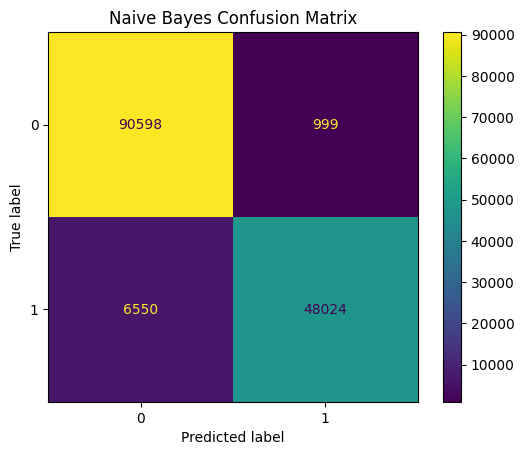

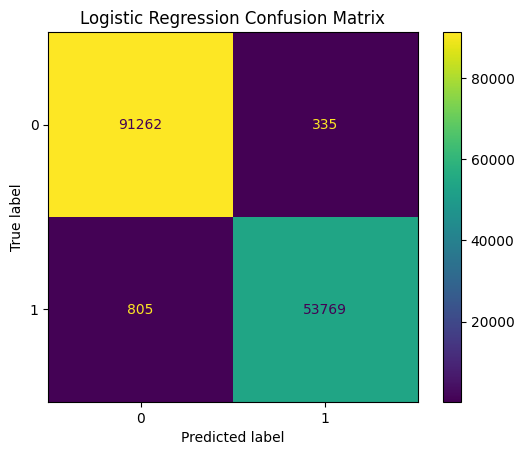

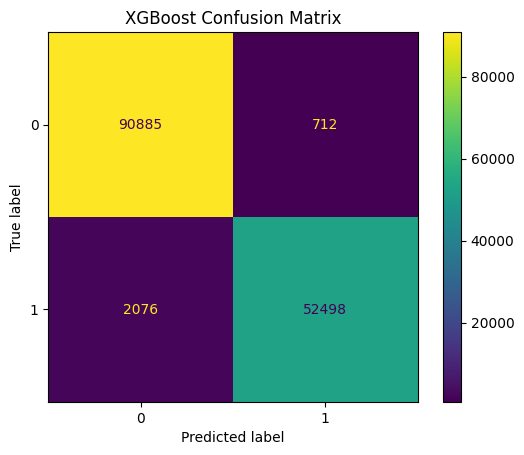

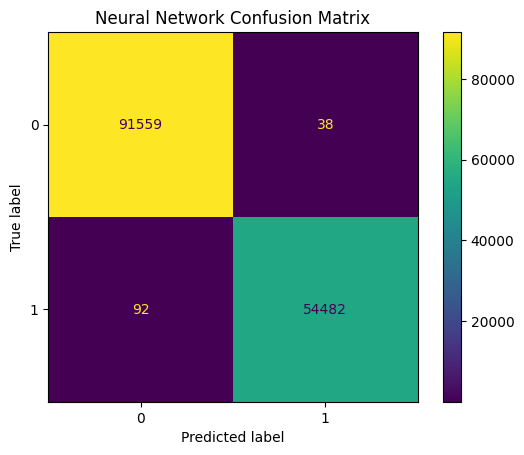

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

for model, name in zip([nb_pipeline, lr_pipeline, xgb_pipeline, nn_pipeline], 
                       ['Naive Bayes', 'Logistic Regression', 'XGBoost','Neural Network' ]):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()


<h1 style="color:darkblue;"><b> 8. Model Comparison </b></h1>


**1- Bar Chart for Accuracy Comparison**

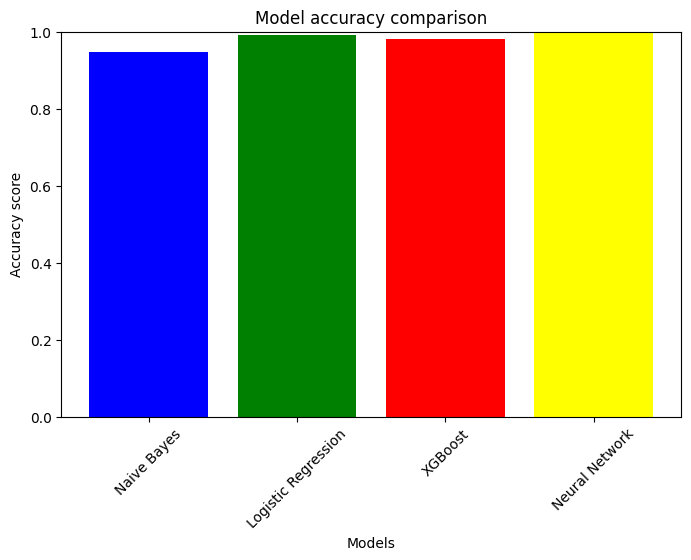

In [60]:
# storing accuracy scores in a dictionary
accuracy_scores = {
    "Naive Bayes": nb_acc,
    "Logistic Regression": lr_acc,
    "XGBoost": xgb_acc,
    "Neural Network": nn_acc
}

# making a bar Chart for Model accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'yellow'])
plt.ylim(0, 1)
plt.xlabel("Models")
plt.ylabel("Accuracy score")
plt.title("Model accuracy comparison")
plt.xticks(rotation=45)
plt.show()

**2- ROC Curves to evaluate my models performance**

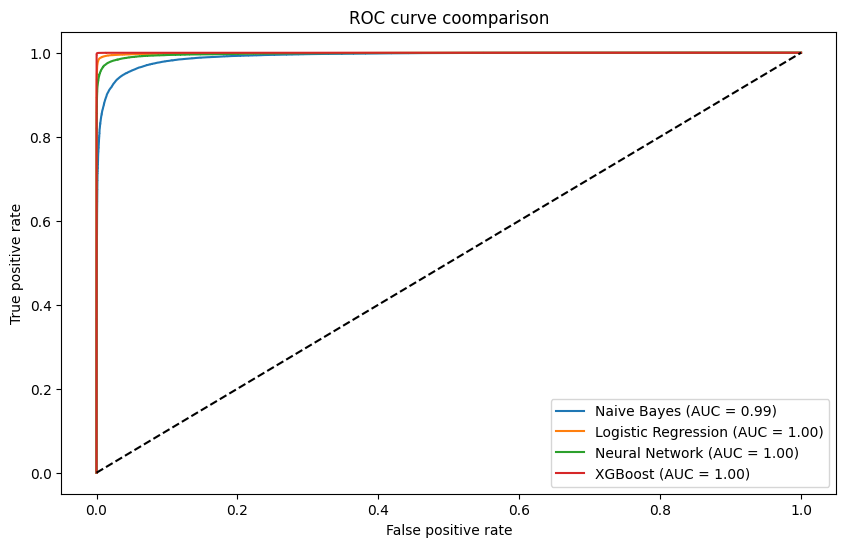

In [61]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for model, name in zip([nb_pipeline, lr_pipeline, xgb_pipeline, nn_pipeline], 
                       ["Naive Bayes", "Logistic Regression", "Neural Network", "XGBoost"]):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # getting prob scores
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # and computing ROC curve
    roc_auc = auc(fpr, tpr)  # AUC score
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal baseline
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve coomparison")
plt.legend()
plt.show()


<h1 style="color:darkblue;"><b> 9.Save Models  </b></h1>


In [62]:
import joblib

# saving each trained model so I don't have to train them over and over again
joblib.dump(nb_pipeline, 'nb.pkl')
joblib.dump(lr_pipeline, 'lr.pkl')
joblib.dump(xgb_pipeline, 'xgb.pkl')
#joblib.dump(svm_pipeline, 'svm.pkl')
joblib.dump(nn_pipeline, 'nn.pkl')

print("All my models are saved")


All my models are saved


**Load Saved Models**

In [63]:
# loading my saved models from saved .pkl files
nb_model = joblib.load('nb.pkl')
lr_model = joblib.load('lr.pkl')
xgb_model = joblib.load('xgb.pkl')
##svm_model = joblib.load('svm.pkl')
nn_model = joblib.load('nn.pkl')


<h1 style="color:darkblue;"><b> 10. Final User Input  </b></h1>

In [86]:
def remove_tags(text):
    tags = ['\n', '\'', '\"']
    for tag in tags:
        text = text.replace(tag, '')
    return text

# removing punctuation
def remove_punc(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

# converting to lowercase and remove extra spaces
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [87]:
import string
import re
# I am again using my preprocessing function (same as the training data)
def preprocess_text(text):
    text = remove_tags(text)
    text = remove_punc(text)
    text = clean_text(text)
    ## Uncomment below if you want to use stopwords/lemmatization, they were taking too long for me so didn't add them
    #text = remove_stopwords(text)
    # text = lemmatize_text(text)
    return text

# Funct to take user input and predict
def predict_user_input(model):
    while True:
        user_text = input("\nEnter your text (must be more than 20 words): ")  # this takes the raw user input I want
        word_count = len(user_text.split())

        if word_count <= 20:
            print("Error: Please enter more than 20 words for a valid prediction")
        else:
            break  # Exit loop when the requirement is met

    cleaned_text = preprocess_text(user_text)  # I have to be preprocessing the raw text because my models are trained on preprocessed text and the raw input wasn't
    prediction = model.predict([cleaned_text])[0]  # it's making prediction
    output = "AI-generated " if prediction == 1 else "Human-written "
    print("\nPredicted as:", output)

In [90]:
#loading my saved model
model_choice = joblib.load('xgb.pkl')  # I can change this to any trained model ('lr.pkl', 'xgb.pkl', etc)

## running the prediction
predict_user_input(model_choice)



Enter your text (must be more than 20 words):  Field Journal 6 One of the rituals that I have been able to closely observe is Knox students, who are Muslims, praying at the Hope Center on Fridays in congregation at around 1:15 PM. Students perform Wudhu(Abulation), involving the washing of hands, nose, face, arms, hair and feet in sequence. Before the start of congregational prayer, the Imam (the person who is going to lead the prayer) recites an Arabic text relating fundamental teachings of Islam called Khutba. After that, the person behind the Imam recites Iqamat, Arabic text prasing God and inviting people to pray. Then the Imam starts the prayer by reciting the Takbeer(saying ‘God is the Greatest’ in Arabic) and continues to recite Arabic verses throughout the prayer in a melodic voice. In Islamic tradition, It is believed that God is giving a special form of attention to humans during prayers and there is connection between God and the person praying where nothing else matters. I


Predicted as: Human-written 


**Two AI-generated and two human-written texts already exist in the dataset for verification**

In [92]:
# getting 2 random human written and ai texts from dataset and will ask our model to predict AND since our model has almost 100% accuracy, it should be correct unless we are very unlucky. YOU CAN TRY IT :)
human_texts = df[df['generated'] == 0]['text'].sample(2).tolist()
ai_texts = df[df['generated'] == 1]['text'].sample(2).tolist()


print("\033[1mRandom Human Written Essays from the Dataset:\033[0m") # used this to bold my text, found it online "https://stackoverflow.com/questions/8924173/how-can-i-print-bold-text-in-python"
for text in human_texts:
    print(text)

print("\n\033[1mRandomm AI Generated Essays from the Dataset:\033[0m")
for text in ai_texts:
    print(text)

Random Human Written Essays from the Dataset:
Most people might not know what Seagoing Cowboys are, but that doesn't mean that to hate it just because of its name. You should at least participate seagoing cowboys once.

People might not have many reasons to support there statement about "WHT to shouldn't be a Seagoing Cowboy'', but I have at least some reasons as WHT to should join the program.

One of CT many reasons is if to love working with animals then tour up for the job. Many of the "Seagoing Cowboys" had to take care of the Horses, young cows, and mules that were shipped overseas. On paragraph two it states "UNRWA hired ''Seagoing Cowboys" to take care of the horses, young cows, and mules that ware shipped overseas."

If to were to join the cowboys to will have to be able to go away from tour family for a while. For example, on paragraph three it states "In August 1945", and on paragraph four it states "BT the time he was discharged in 1947", what I am trying to do is prove CT 

<div style="text-align:center;">
    <h1 style="color:#8B0000;"><b> END </b></h1>
    </div>
